Dataset Shape: (41188, 21)

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed   

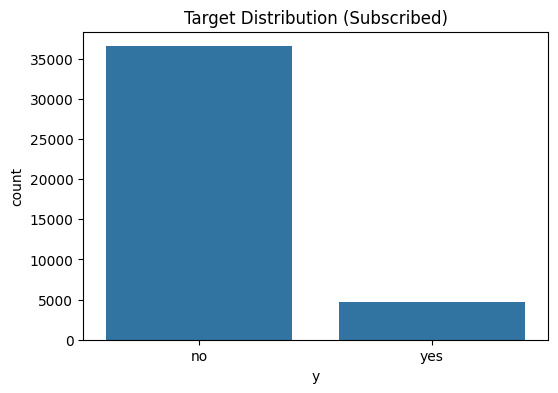

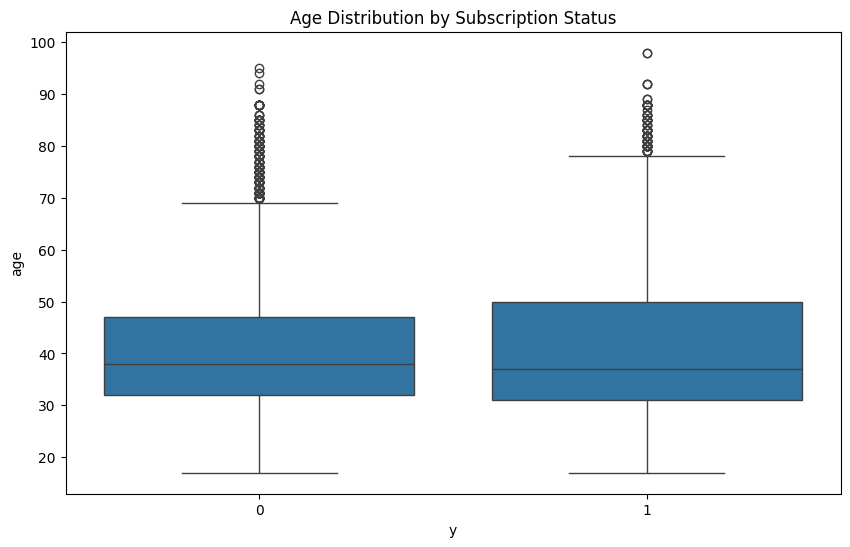

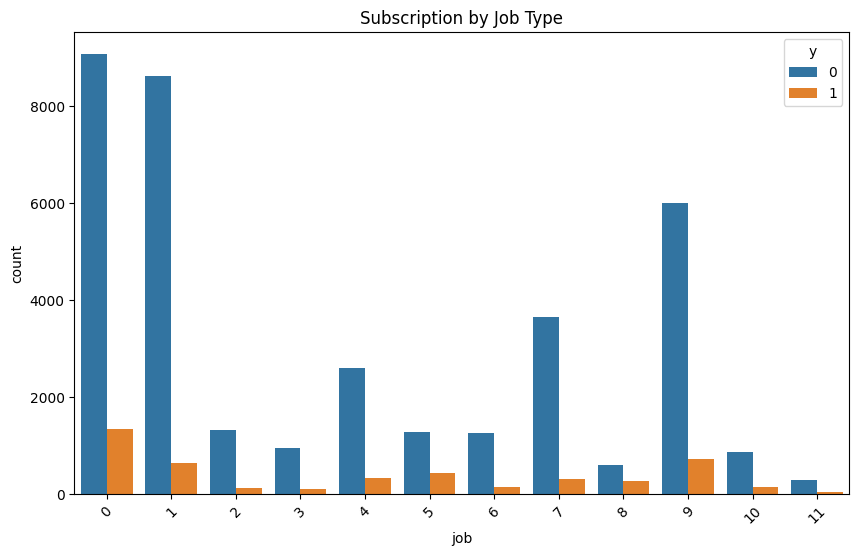

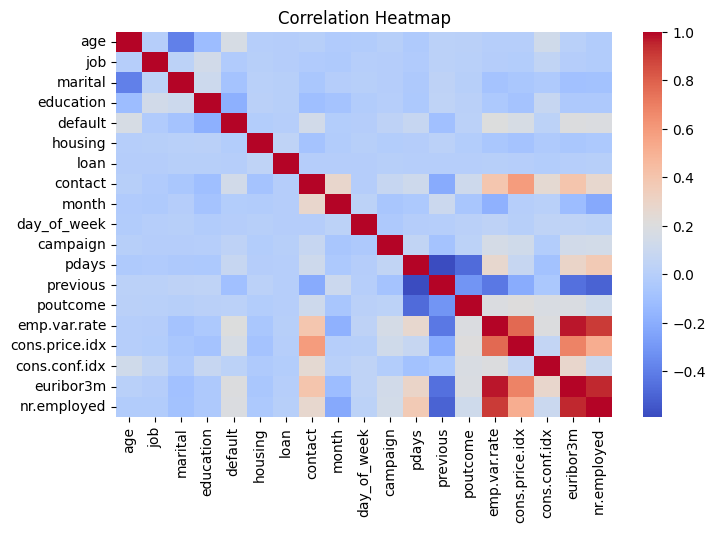


Logistic Regression Results:
Accuracy: 0.9007040543821316
ROC-AUC: 0.7954696418463135
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.70      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238


Random Forest Results:
Accuracy: 0.8973051711580481
ROC-AUC: 0.7880670963252985
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.58      0.31      0.40       928

    accuracy                           0.90      8238
   macro avg       0.75      0.64      0.67      8238
weighted avg       0.88      0.90      0.88      8238


Gradient Boosting Results:
Accuracy: 0.902889050740471
ROC-AUC: 0.8133014086749375
Classification Report:
               precisio

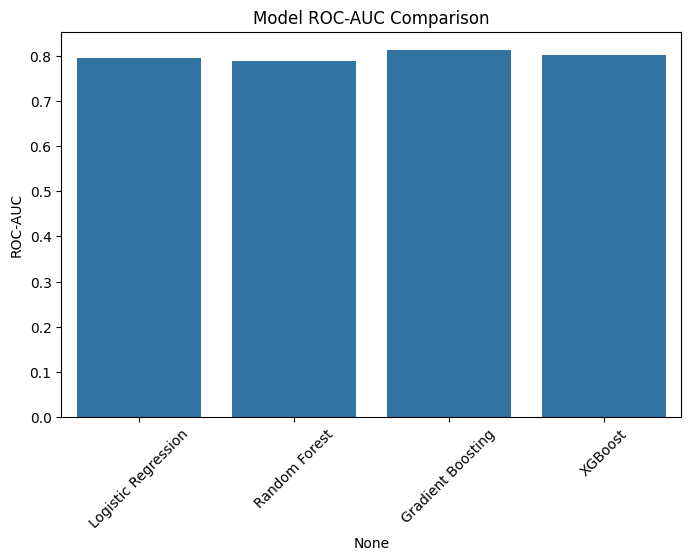

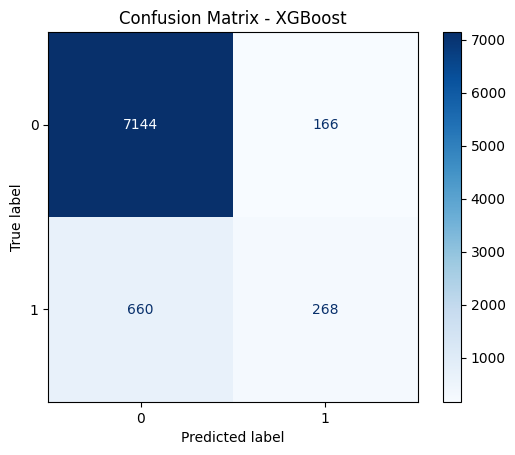

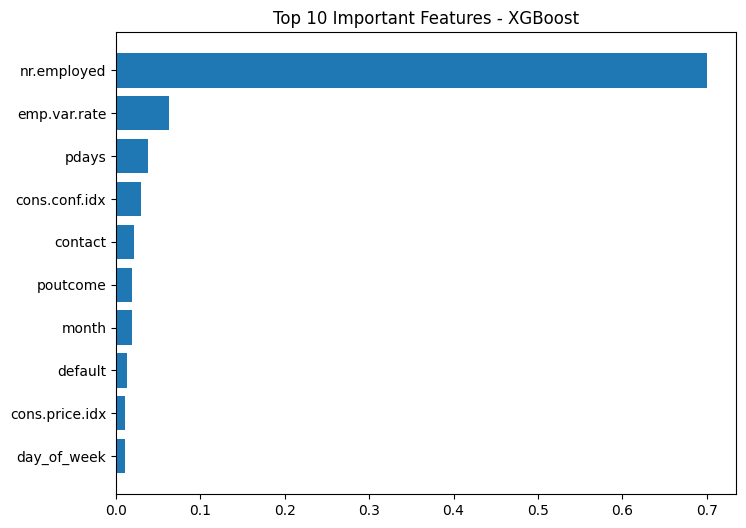


Suggestions:
1. Target older customers & retirees – they show higher subscription rates.
2. Jobs like management, technicians, and blue-collar workers respond differently; personalized offers may help.
3. Previous successful campaign contacts are strong predictors – focus on clients with prior engagement.
4. Economic indicators (euribor rate, employment variation) influence success – time campaigns strategically.
5. Avoid over-contacting (high campaign count correlates with fewer subscriptions).


Challenges & Techniques:
1. Imbalanced target: Subscription (yes) cases are fewer than no.
   -> Used stratified split & ROC-AUC for evaluation.
2. Many categorical variables:
   -> Used Label Encoding to convert them to numeric.
3. Duration attribute is data-leakage:
   -> Dropped 'duration' for realistic modeling.
4. Multi-model comparison:
   -> Compared Logistic Regression, Random Forest, Gradient Boosting, and XGBoost to choose best.



In [3]:
# PRCP-1000: Portuguese Bank Marketing Campaign Prediction
# --------------------------------------------------------
# Task 1: Complete Data Analysis
# Task 2: Predictive Model to identify customers likely to subscribe
# Task 3: Suggestions for Marketing Team
# Task 4: Challenges faced & techniques used

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# ------------------------------------------
# Step 2: Load Dataset
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
print("Dataset Shape:", df.shape)
df.head()

# ------------------------------------------
# Step 3: Initial Exploration
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nTarget Distribution:\n", df['y'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title('Target Distribution (Subscribed)')
plt.show()

# ------------------------------------------
# Step 4: Data Cleaning & Preprocessing
# Drop 'duration' (not usable for realistic prediction)
df = df.drop(columns=['duration'])

# Drop rows with missing target variable 'y'
df.dropna(subset=['y'], inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Features & Target
X = df.drop('y', axis=1)
y = df['y']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ------------------------------------------
# Step 5: Exploratory Data Analysis (Insights)
plt.figure(figsize=(10,6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age Distribution by Subscription Status')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Subscription by Job Type')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(pd.DataFrame(X, columns=df.drop('y', axis=1).columns).corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ------------------------------------------
# Step 6: Model Training & Evaluation

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"\n{model_name} Results:")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return acc, roc

results = {}

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
results['Logistic Regression'] = evaluate_model(lr, X_train, y_train, X_test, y_test, "Logistic Regression")

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
results['Random Forest'] = evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
results['Gradient Boosting'] = evaluate_model(gb, X_train, y_train, X_test, y_test, "Gradient Boosting")

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
results['XGBoost'] = evaluate_model(xgb_clf, X_train, y_train, X_test, y_test, "XGBoost")

# ------------------------------------------
# Step 7: Model Comparison
results_df = pd.DataFrame(results, index=['Accuracy', 'ROC-AUC']).T
print("\nModel Performance Comparison:\n", results_df)

plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df['ROC-AUC'])
plt.title('Model ROC-AUC Comparison')
plt.xticks(rotation=45)
plt.show()

# ------------------------------------------
# Step 8: Confusion Matrix for Best Model (XGBoost)
from sklearn.metrics import ConfusionMatrixDisplay
y_pred_best = xgb_clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ------------------------------------------
# Step 9: Feature Importance (XGBoost)
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [df.drop('y', axis=1).columns[i] for i in indices])
plt.title('Top 10 Important Features - XGBoost')
plt.show()

# ------------------------------------------
# Step 10: Suggestions for Marketing Team
print("""
Suggestions:
1. Target older customers & retirees – they show higher subscription rates.
2. Jobs like management, technicians, and blue-collar workers respond differently; personalized offers may help.
3. Previous successful campaign contacts are strong predictors – focus on clients with prior engagement.
4. Economic indicators (euribor rate, employment variation) influence success – time campaigns strategically.
5. Avoid over-contacting (high campaign count correlates with fewer subscriptions).
""")

# ------------------------------------------
# Step 11: Challenges & Techniques
print("""
Challenges & Techniques:
1. Imbalanced target: Subscription (yes) cases are fewer than no.
   -> Used stratified split & ROC-AUC for evaluation.
2. Many categorical variables:
   -> Used Label Encoding to convert them to numeric.
3. Duration attribute is data-leakage:
   -> Dropped 'duration' for realistic modeling.
4. Multi-model comparison:
   -> Compared Logistic Regression, Random Forest, Gradient Boosting, and XGBoost to choose best.
""")